<b>Importing Related Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<b>Preprocessing

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)

In [3]:
pd.set_option('max_colwidth',200)

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.tail(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
180,181,Female,37,97,32
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88
184,185,Female,41,99,39
185,186,Male,30,99,97
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85


In [7]:
df.shape

(200, 5)

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


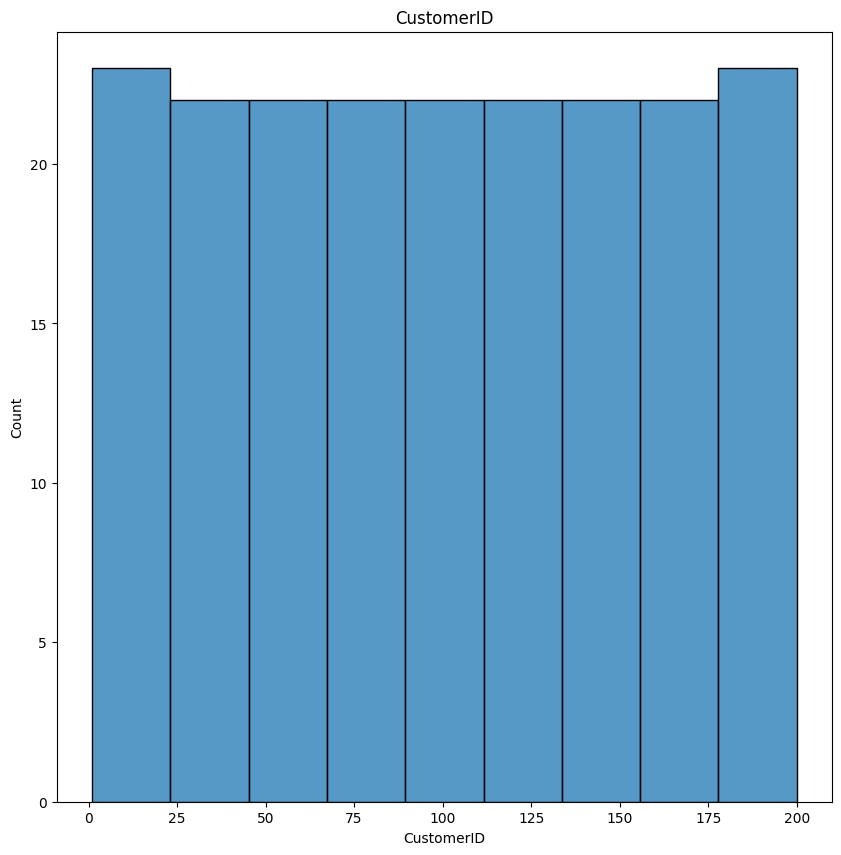

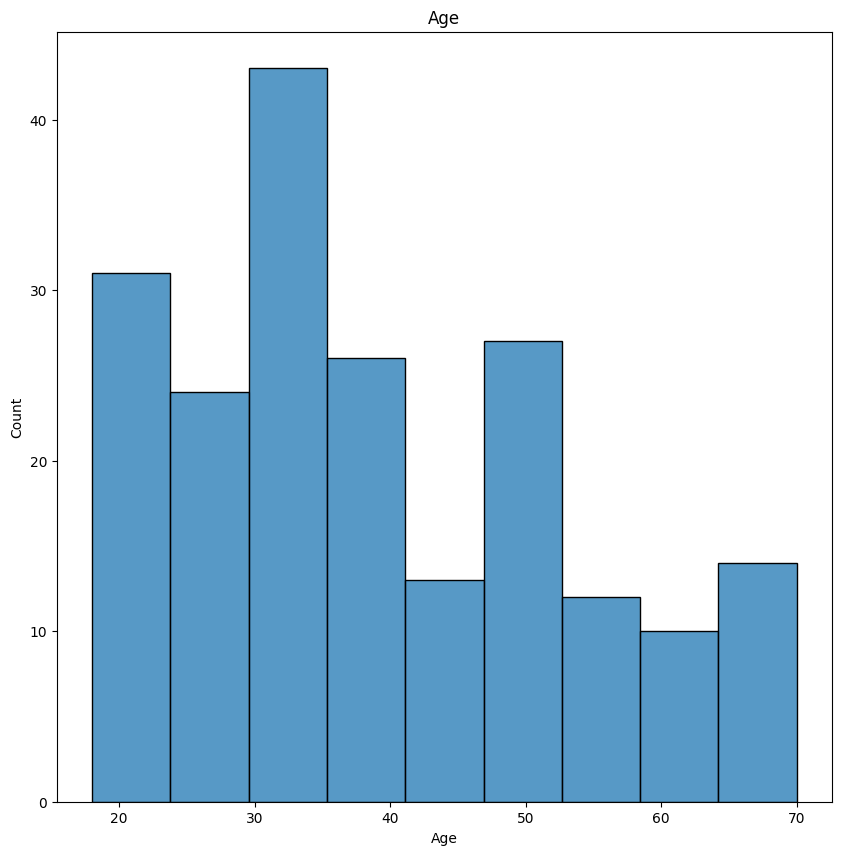

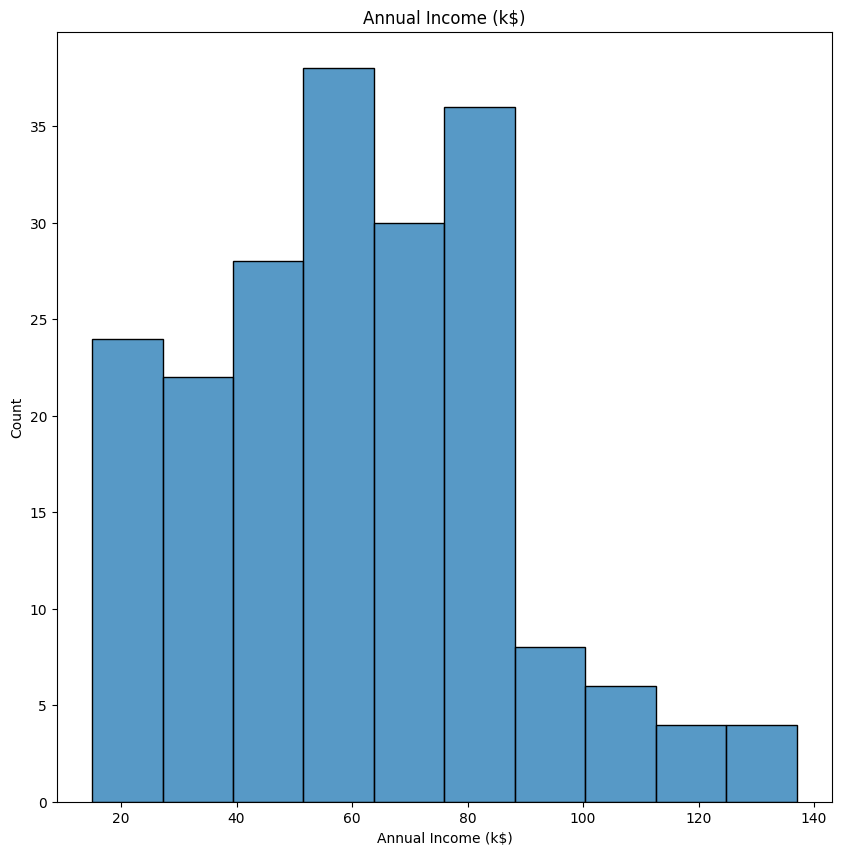

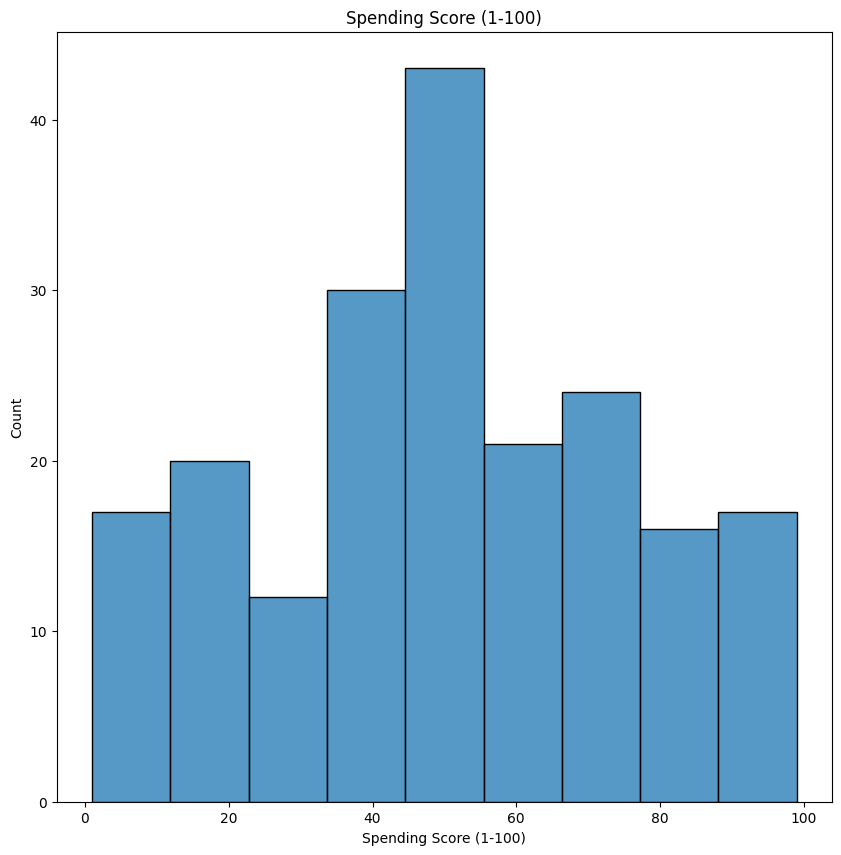

In [10]:
# get the numerical columns of the DataFrame
num_cols = df.select_dtypes(include=['float64','int64']).columns
# create a figure with size (10, 10) for each numerical column
for col in num_cols:
    plt.figure(figsize=(10,10))
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.show()

In [11]:
cat_cols = df.select_dtypes(include=['object','category']).columns 

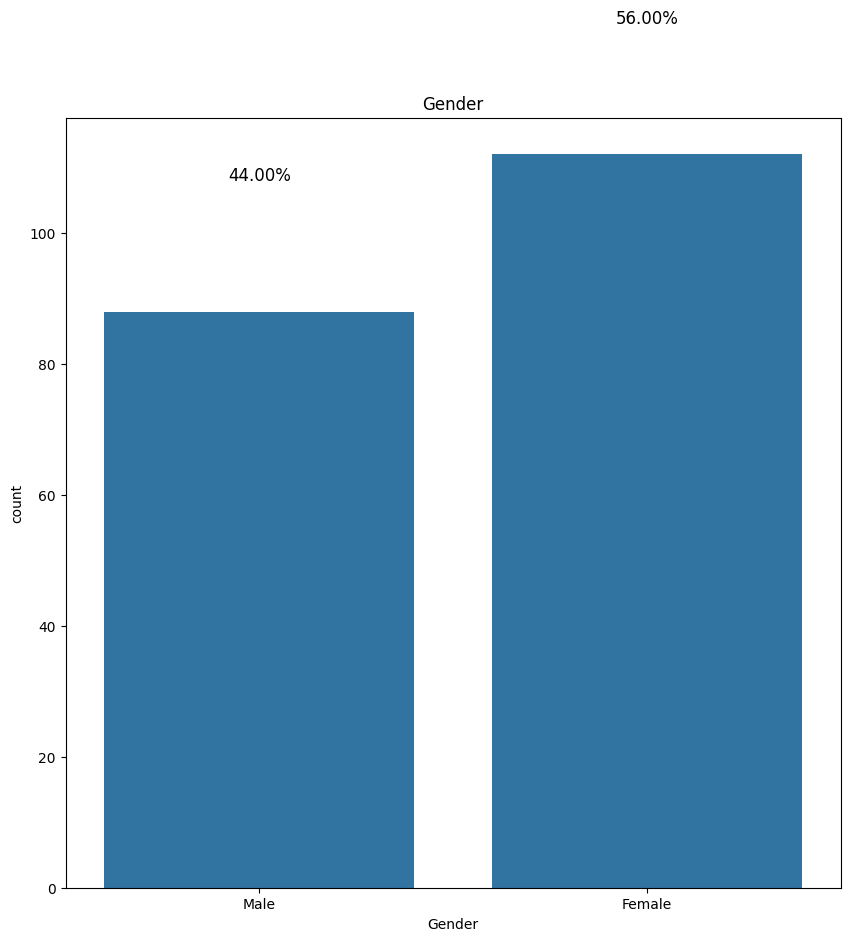

In [12]:
# create a countplot for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10,10))
    ax = sns.countplot(data=df, x=col)
    plt.title(col)
    
    # add percentage labels on each bar
    for p in ax.containers[0].patches:
        percent = (p.get_height()/len(df))*100
        ax.text(p.get_x()+p.get_width()/2,
                p.get_height()+20,
                '{:1.2f}%'.format(percent),
                ha='center', fontsize=12)
    plt.show()

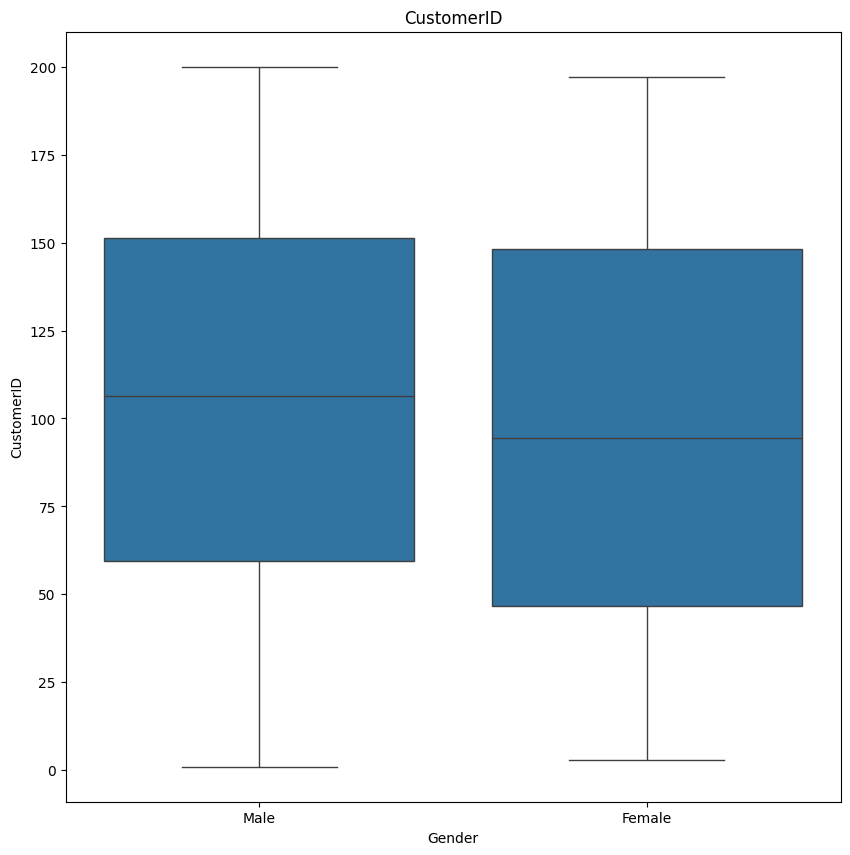

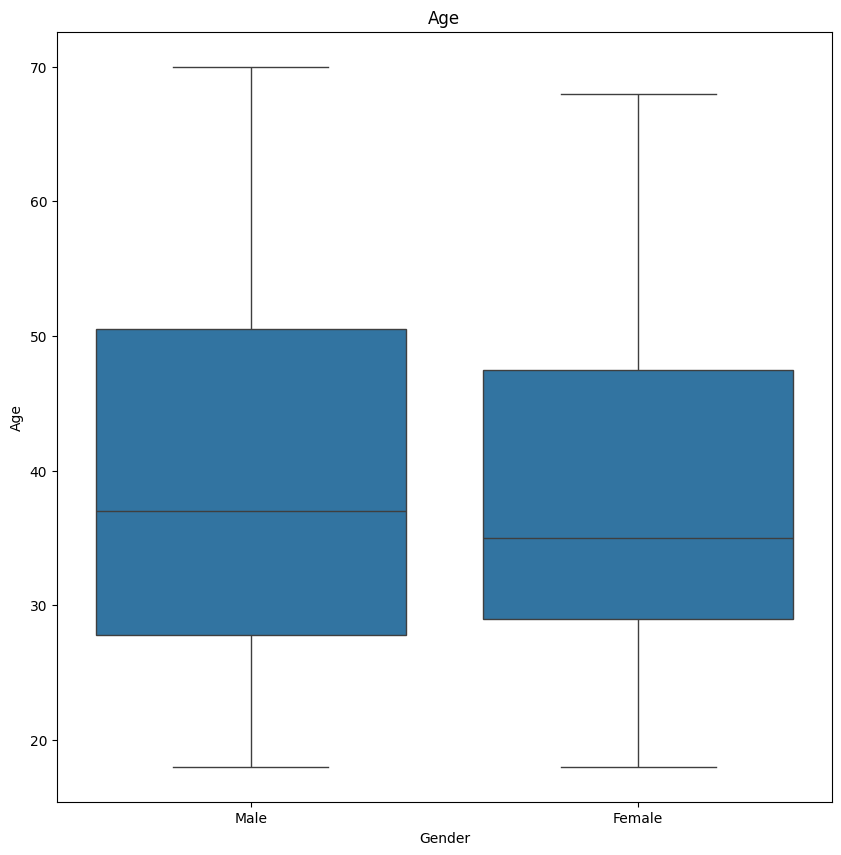

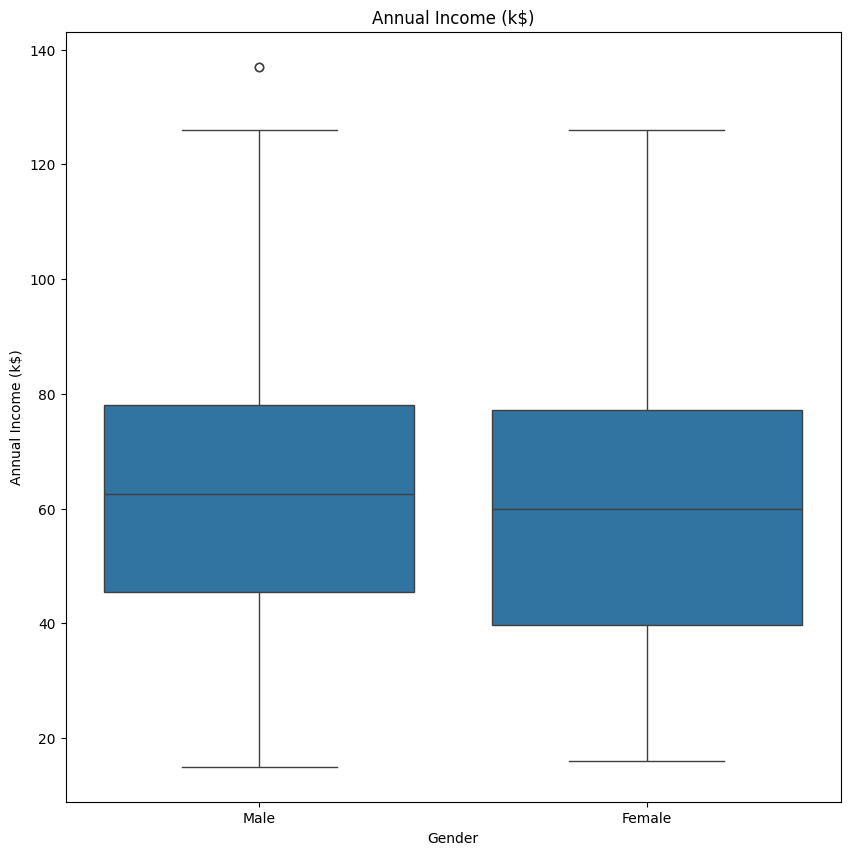

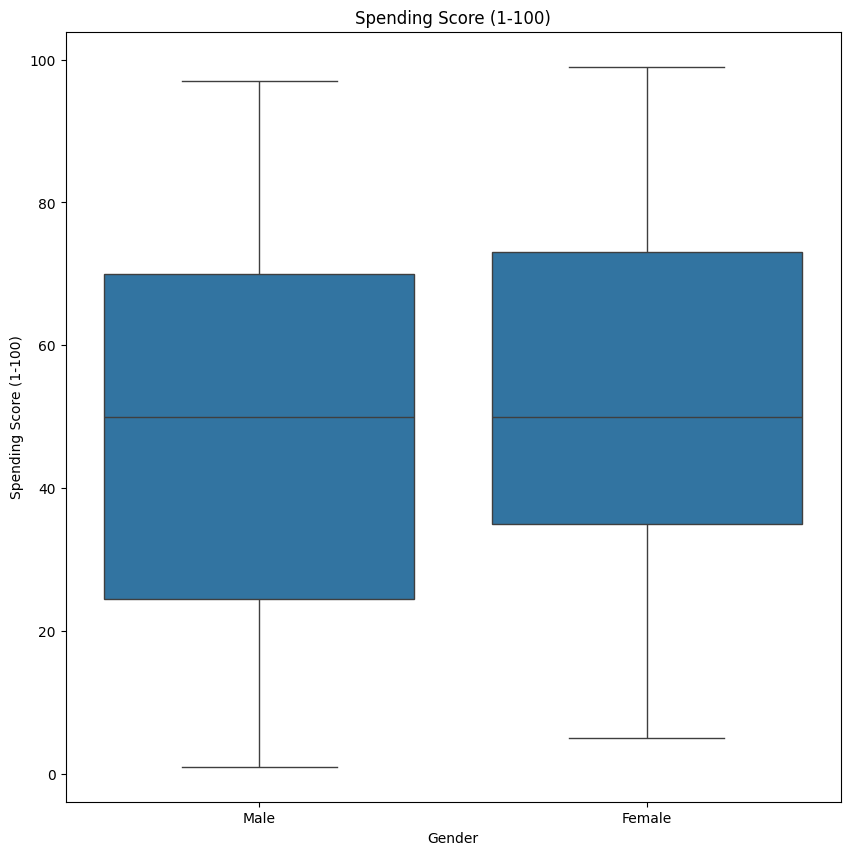

In [13]:
# create a countplot for each categorical column
for col in  df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(10,10))
    ax = sns.boxplot(data=df, y=col, x="Gender")
    plt.title(col)
   
    plt.show()

<b>EXPLORATORY DATA ANALYSIS

In [14]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)  ## drop the columns that are not needed

In [15]:
print(df.columns)

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

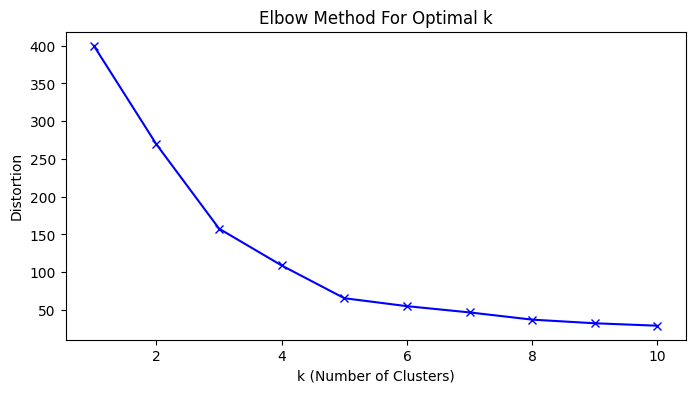

In [17]:
# Function to plot the elbow diagram
def plot_elbow(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k (Number of Clusters)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()

# Uncomment the line below to plot the elbow diagram
# Plot the elbow diagram
plot_elbow(df_scaled)


In [18]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [19]:
# Function to find knee/elbow in k-distance graph for MinPts
def find_minpts(data):
    nn = NearestNeighbors(n_neighbors=2)
    nn.fit(data)
    distances, indices = nn.kneighbors(data)
    distances = np.sort(distances, axis=0)[:, 1]

    # Find knee/elbow in the graph
    knee = np.argmax(np.diff(distances, 2)) - 1
    minpts = knee  # You may need to adjust this based on your dataset

    return minpts

# Function to find epsilon given MinPts
def find_epsilon(data, minpts):
    nn = NearestNeighbors(n_neighbors=minpts)
    nn.fit(data)
    distances, indices = nn.kneighbors(data)
    distances = np.sort(distances, axis=0)[:, -1]

    # Set epsilon to 5
    epsilon = 5

    return epsilon

# Find optimal MinPts
minpts = find_minpts(df_scaled)

# Find epsilon with the specified MinPts
epsilon = find_epsilon(df_scaled, minpts)

# Display the results
print("Optimal MinPts:", minpts)
print("Optimal Epsilon:", epsilon)

Optimal MinPts: 5
Optimal Epsilon: 5


In [20]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [22]:
labels = dbscan.fit_predict(df)

In [23]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

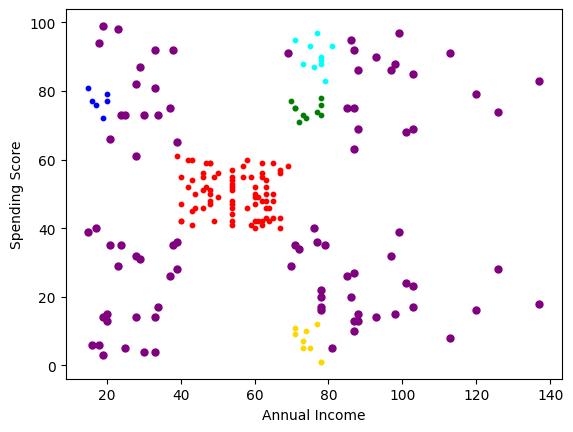

In [24]:
# Visualising the clusters
plt.scatter(df.iloc[labels == -1, 0], df.iloc[labels == -1, 1], s=25, c='purple')
plt.scatter(df.iloc[labels == 0, 0], df.iloc[labels == 0, 1], s=10, c='blue')
plt.scatter(df.iloc[labels == 1, 0], df.iloc[labels == 1, 1], s=10, c='red')
plt.scatter(df.iloc[labels == 2, 0], df.iloc[labels == 2, 1], s=10, c='green')
plt.scatter(df.iloc[labels == 3, 0], df.iloc[labels == 3, 1], s=10, c='gold')
plt.scatter(df.iloc[labels == 4, 0], df.iloc[labels == 4, 1], s=10, c='aqua')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you've already defined and fitted kmeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # You should adjust the number of clusters accordingly
kmeans.fit(df)

# Calculate the Silhouette score for KMeans clustering
kmeans_silhouette_score = silhouette_score(df, kmeans.labels_)
print("Silhouette score for KMeans:", kmeans_silhouette_score)

# Now, assuming you've performed DBSCAN clustering and stored the labels in the 'labels' variable
# Calculate the Silhouette score for DBSCAN clustering
dbscan_silhouette_score = silhouette_score(df, labels)
print("Silhouette score for DBSCAN:", dbscan_silhouette_score)


Silhouette score for KMeans: 0.46761358158775435
Silhouette score for DBSCAN: 0.1135163893571667
